In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.decomposition import PCA

In [2]:
bank = pd.read_csv("SwissBank.csv")
bank

,length,lheight,rheight,lmargin,umargin,diagonal
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6
196,215.1,130.3,129.9,10.3,11.5,139.7
197,214.8,130.3,130.4,10.6,11.1,140.0
198,214.7,130.7,130.8,11.2,11.2,139.4


In [3]:
bank.describe()

,length,lheight,rheight,lmargin,umargin,diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


# 3 question
## difference between min and max number for "length" is 2.5, so we can't tell the difference between banknotes. Same for "lheight", "rheight".
## but for "lmargin", "umargin" and "diagonal" there is a bigger difference between min and max, so we can think about them as discriminative characteristics 

In [4]:
bank.shape

(200, 6)

In [5]:
from pca import pca

In [6]:
bank_pca = pca(n_components=0.95, normalize=False)

In [7]:
pca_results = bank_pca.fit_transform(bank)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


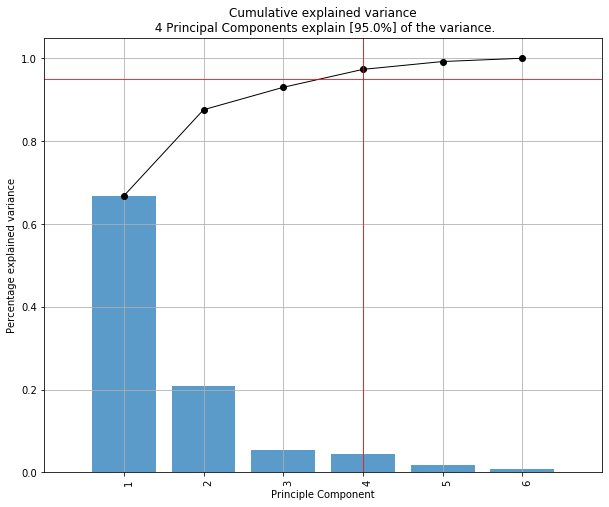

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = bank_pca.plot()

In [14]:
import plotly
import plotly.express as px

In [15]:
pca = PCA()
pca.fit(bank)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

# So as we can see, 4 components are enough to explain 95% of variance. If we want 100% then we should consider 6 PCA. Minimum number of principal components depends on how much variance we want to explain. 

In [16]:
print(pca_results['PC'].std()**2)

PC1    3.000305
PC2    0.935621
PC3    0.243414
PC4    0.194659
dtype: float64


# 1 question

## Also we can look for eigenvalues and use for our analysis PC if PC > 1. According to the information above for our analysis we can use PC1 and PC2 (PC2 is a little bit lower than 1, but it is just a little bit)

## So the minimum of PC is 2. Two PC will explain 87% of variance

In [17]:
print(pca_results)

{'loadings':        length   lheight   rheight   lmargin   umargin  diagonal
PC1 -0.043774  0.112162  0.139191  0.768305  0.201766 -0.578902
PC2 -0.010710 -0.071447 -0.066282  0.563072 -0.659290  0.488543
PC3  0.326316  0.258961  0.344733  0.218022  0.556686  0.591763
PC4  0.561692  0.455459  0.415330 -0.186108 -0.450699 -0.258448
PC5 -0.752573  0.346801  0.534652 -0.099968 -0.101902  0.084459
PC6 -0.098098  0.766512 -0.631697  0.022217  0.034859  0.045679, 'PC':           PC1       PC2       PC3       PC4
0   -0.549648  0.506373  0.275865  1.193728
1   -2.018629  0.661264 -0.501997 -0.015445
2   -1.835675  1.175307  0.045629 -0.189065
3   -2.494367 -0.118892  0.076525 -0.316138
4   -0.701323  3.194767 -0.838774  0.521050
..        ...       ...       ...       ...
195  1.249123 -1.159365  0.613762 -0.186819
196  1.306226 -0.457122  0.294979 -0.172196
197  1.365068  0.092151  0.389711 -0.086127
198  2.298487  0.016919  0.429981  0.204354
199  1.277440 -0.525137 -0.150638 -0.759278

[20

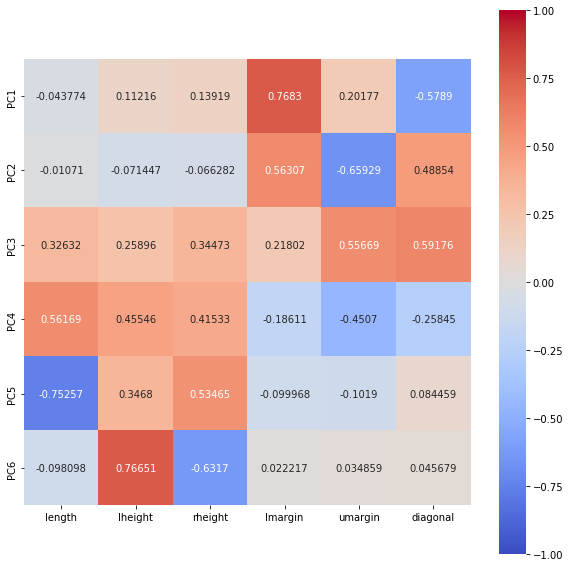

In [18]:
import seaborn as sns
fig, ax = plt.pyplot.subplots(figsize=(10,10))
map = sns.heatmap(pca_results['loadings'], annot=True, fmt='.5g', cmap="coolwarm", vmin=-1, vmax=1, center= 0, square=True)

## So as we can see PC1 and lmargin, PC1 and diagonal have the biggest correlation between. PC2 has correlation with lmargin and umargin. PC1 and PC2 explain the biggest percentage of variance. So according to that lmargin and umargin discriminate the banknotes well

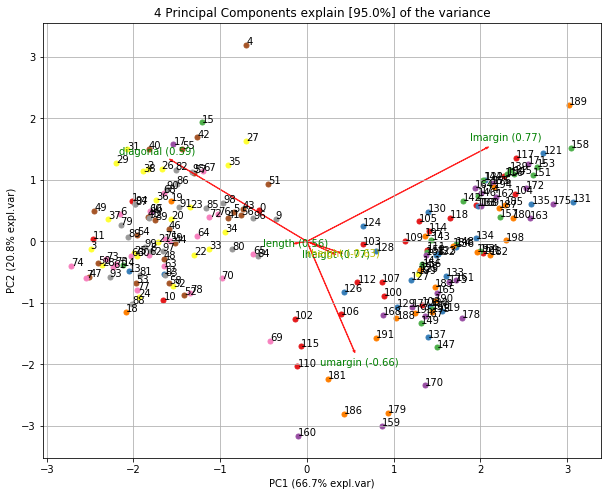

In [19]:
fig, ax = bank_pca.biplot(legend=False)

## thanks to biplot we can observe that most of the banknotes are in dependence on diagonal and lmargin parameters 